In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
cwd = os.getcwd()

In [21]:
scorecard_df = pd.read_csv(cwd+'/scorecard.csv').drop(columns='Unnamed: 0')
display(scorecard_df.head(2))

,Week Start,Number_Unique_Institutions,Number_Unique_Users,Number_Unique_Classes,Number_Cluster_Simulations,Total_Simulations_All
0,2017-1-30,14,290,23,4073,27868
1,2017-2-6,17,262,31,4260,29697


In [22]:
sc_df_4 = pd.read_csv(cwd+'/scorecard_4week.csv').drop(columns='Unnamed: 0')
display(sc_df_4.head(2))

,Week Start,Number_Unique_Institutions,Number_Unique_Users,Number_Unique_Classes,Number_Cluster_Simulations,Total_Simulations_All
0,2017-1-30,14,305,23,5958,117270
1,2017-2-6,17,445,36,10438,135663


In [23]:
## plot per year - segment into indexes of 52 weeks
interval = 52 # 52 weeks
year1 = scorecard_df.iloc[:interval]
year2 = scorecard_df.iloc[interval:2*interval]
year3 = scorecard_df.iloc[2*interval:3*interval]
year4 = scorecard_df.iloc[3*interval:-1]

In [24]:
## plot per year - segment into indexes of 52 weeks
interval = 52 # 52 weeks
year1_4 = sc_df_4.iloc[:interval]
year2_4 = sc_df_4.iloc[interval:2*interval]
year3_4 = sc_df_4.iloc[2*interval:3*interval]
year4_4 = sc_df_4.iloc[3*interval:-1]

## institutions

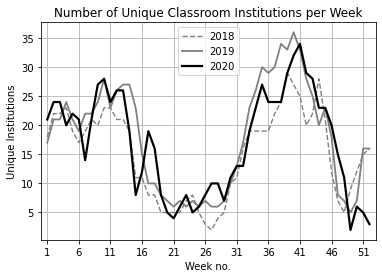

In [27]:
# plot number of unqiue institutions
plt.figure('institutions')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Unique_Institutions'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2['Number_Unique_Institutions'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3['Number_Unique_Institutions'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4['Number_Unique_Institutions'],color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(which='both')
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Number of Unique Classroom Institutions per Week')
plt.xlabel('Week no.')
plt.ylabel('Unique Institutions')
plt.savefig('institutions.png',dpi=500,transparent=True)
plt.savefig('institutions2.png',dpi=500)

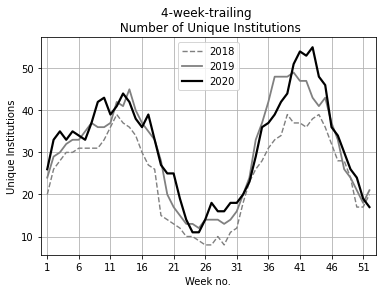

In [42]:
# plot number of unqiue institutions
plt.figure('institutions')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Unique_Institutions'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2_4['Number_Unique_Institutions'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3_4['Number_Unique_Institutions'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4_4['Number_Unique_Institutions'],color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(which='both')
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('4-week-trailing \n Number of Unique Institutions')
plt.xlabel('Week no.')
plt.ylabel('Unique Institutions')
plt.savefig('institutions_4week.png',dpi=500,transparent=True)
plt.savefig('institutions_4week2.png',dpi=500)

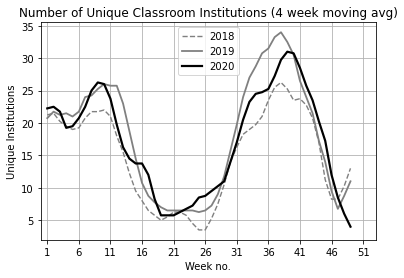

In [93]:
## 4 week moving average test
def conv_data(data,factor=4):
    return np.convolve(data, np.ones(factor)/factor, mode='valid')

plt.figure('institutions_4week_conv')
weeks = range(1,interval-2)

# plt.plot(weeks,year1['Number_Unique_Institutions'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,conv_data(year2['Number_Unique_Institutions']),color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,conv_data(year3['Number_Unique_Institutions']),color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,conv_data(year4['Number_Unique_Institutions']),color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(which='both')
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Number of Unique Classroom Institutions (4 week moving avg)')
plt.xlabel('Week no.')
plt.ylabel('Unique Institutions')

plt.savefig('institutions_4week_avg.png',dpi=500,transparent=True)
plt.savefig('institutions2_4week_avg.png',dpi=500)

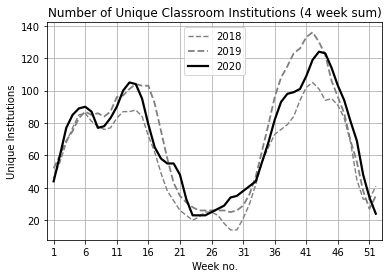

In [96]:
# 4 week sum test
def cumsum_year(c_data,p_data,factor=4,interval=interval,ind='Number_Unique_Institutions'):
    hold_var = []
    for i in range(interval):
        if i <= 3:
            temp = p_data[ind].to_list()[-(4-i):]
            hold_var.append(sum(temp)+ sum(c_data[ind].to_list()[:i]))

        else:
            hold_var.append(sum(c_data[ind].to_list()[i-4:i]))
    return hold_var

year2_orgs = cumsum_year(year2,year1)
year3_orgs = cumsum_year(year3,year2)
year4_orgs = cumsum_year(year4,year3)

weeks = range(1,interval+1)

plt.figure('institutions_4week_sum')
plt.plot(weeks,year2_orgs,color='grey',linestyle='dashed',label='2018',linewidth=1.4)  
plt.plot(weeks,year3_orgs,color='grey',label='2019',linewidth=1.8)    
plt.plot(weeks,year4_orgs,color='black',label='2020',linewidth=2.2) 
plt.legend(loc='upper center')
plt.grid(which='both')
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Number of Unique Classroom Institutions (4 week sum)')
plt.xlabel('Week no.')
plt.ylabel('Unique Institutions')
plt.savefig('institutions_4week_sum.png',dpi=500,transparent=True)
plt.savefig('institutions2_4week_sum.png',dpi=500)

## Users

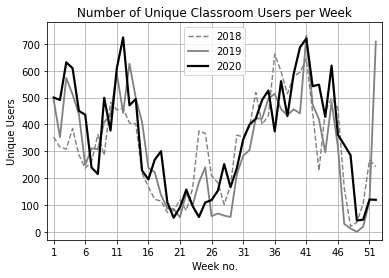

In [29]:
# plot number of unqiue users
plt.figure('unique_users')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Unique_Users'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2['Number_Unique_Users'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3['Number_Unique_Users'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4['Number_Unique_Users'],color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(True)
plt.ylim(-30,780)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Number of Unique Classroom Users per Week')
plt.xlabel('Week no.')
plt.ylabel('Unique Users')
plt.savefig('class_users.png',dpi=500,transparent=True)
plt.savefig('class_users2.png',dpi=500)

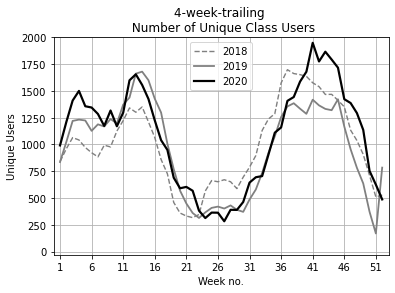

In [41]:
# plot number of unqiue users
plt.figure('unique_users')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Unique_Users'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2_4['Number_Unique_Users'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3_4['Number_Unique_Users'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4_4['Number_Unique_Users'],color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(True)
plt.ylim(-30,2000)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('4-week-trailing \n Number of Unique Class Users')
plt.xlabel('Week no.')
plt.ylabel('Unique Users')
plt.savefig('class_users_4week.png',dpi=500,transparent=True)
plt.savefig('class_users2_4week.png',dpi=500)

Text(0, 0.5, 'Unique Users')

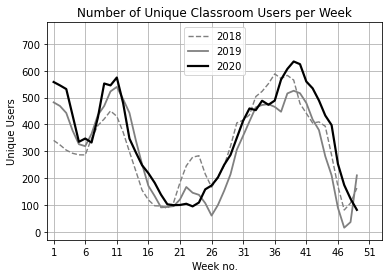

In [95]:
# plot number of unqiue users
plt.figure('unique_users_4week_conv')
weeks = range(1,interval-2)

# plt.plot(weeks,year1['Number_Unique_Users'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,conv_data(year2['Number_Unique_Users']),color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,conv_data(year3['Number_Unique_Users']),color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,conv_data(year4['Number_Unique_Users']),color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(True)
plt.ylim(-30,780)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Number of Unique Classroom Users per Week')
plt.xlabel('Week no.')
plt.ylabel('Unique Users')
# plt.savefig('class_users_4week_avg.png',dpi=500,transparent=True)
# plt.savefig('class_users2_4week_avg.png',dpi=500)

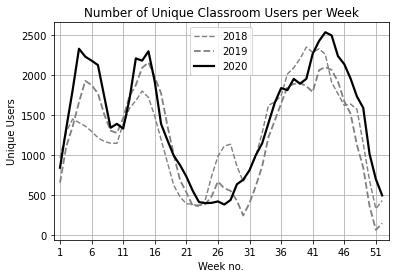

In [98]:

year2_users = cumsum_year(year2,year1,ind='Number_Unique_Users')
year3_users = cumsum_year(year3,year2,ind='Number_Unique_Users')
year4_users = cumsum_year(year4,year3,ind='Number_Unique_Users')

weeks = range(1,interval+1)

plt.figure('institutions_4week_sum')
plt.plot(weeks,year2_users,color='grey',linestyle='dashed',label='2018',linewidth=1.4)  
plt.plot(weeks,year3_users,color='grey',label='2019',linewidth=1.8)    
plt.plot(weeks,year4_users,color='black',label='2020',linewidth=2.2) 
plt.legend(loc='upper center')
plt.grid(True)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Number of Unique Classroom Users (4 week sum)')
plt.xlabel('Week no.')
plt.ylabel('Unique Users')
plt.savefig('class_users_4week_sum.png',dpi=500,transparent=True)
plt.savefig('class_users2_4week_sum.png',dpi=500)

## Classes

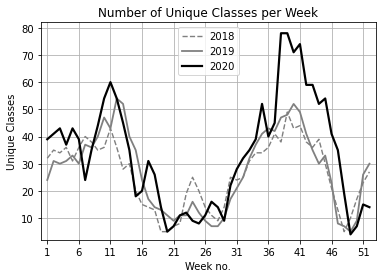

In [40]:
# plot number of unqiue classes
plt.figure('unique_classes')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Unique_Classes'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2['Number_Unique_Classes'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3['Number_Unique_Classes'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4['Number_Unique_Classes'],color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(True)

plt.title('Number of Unique Classes per Week')
plt.xlabel('Week no.')
plt.ylabel('Unique Classes')
plt.ylim(2,82)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.savefig('classes.png',dpi=500,transparent=True)
plt.savefig('classes2.png',dpi=500)

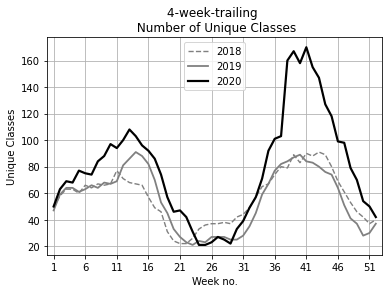

In [43]:
# plot number of unqiue classes
plt.figure('unique_classes')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Unique_Classes'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2_4['Number_Unique_Classes'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3_4['Number_Unique_Classes'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4_4['Number_Unique_Classes'],color='black',label='2020',linewidth=2.2)
plt.legend(loc='upper center')
plt.grid(True)

plt.title('4-week-trailing \n Number of Unique Classes')
plt.xlabel('Week no.')
plt.ylabel('Unique Classes')
# plt.ylim(2,82)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.savefig('classes_4week.png',dpi=500,transparent=True)
plt.savefig('classes2_4week.png',dpi=500)

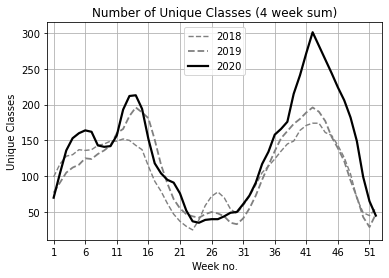

In [101]:

year2_classes = cumsum_year(year2,year1,ind='Number_Unique_Classes')
year3_classes = cumsum_year(year3,year2,ind='Number_Unique_Classes')
year4_classes = cumsum_year(year4,year3,ind='Number_Unique_Classes')

weeks = range(1,interval+1)

plt.figure('unique_classes_4week_sum')
plt.plot(weeks,year2_classes,color='grey',linestyle='dashed',label='2018',linewidth=1.4)  
plt.plot(weeks,year3_classes,color='grey',label='2019',linewidth=1.8)    
plt.plot(weeks,year4_classes,color='black',label='2020',linewidth=2.2) 
plt.legend(loc='upper center')
plt.grid(True)

plt.title('Number of Unique Classes (4 week sum)')
plt.xlabel('Week no.')
plt.ylabel('Unique Classes')
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.savefig('class_users_4week_sum.png',dpi=500,transparent=True)
plt.savefig('class_users2_4week_sum.png',dpi=500)

## Total Simulations

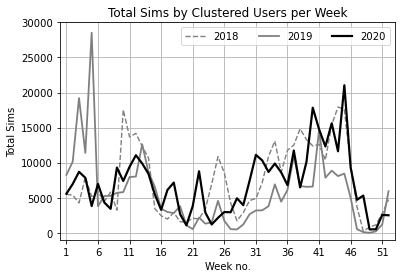

In [38]:
# plot number of cluster sims
plt.figure('cluster_sims')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Cluster_Simulations'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2['Number_Cluster_Simulations'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3['Number_Cluster_Simulations'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4['Number_Cluster_Simulations'],color='black',label='2020',linewidth=2.2)
plt.legend(loc = 'upper right',ncol=4)
plt.grid(True)
plt.ylim(-1000,30000)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Total Sims by Clustered Users per Week')
plt.xlabel('Week no.')
plt.ylabel('Total Sims')
plt.savefig('total_sims.png',dpi=500,transparent=True)
plt.savefig('total_sims2.png',dpi=500)

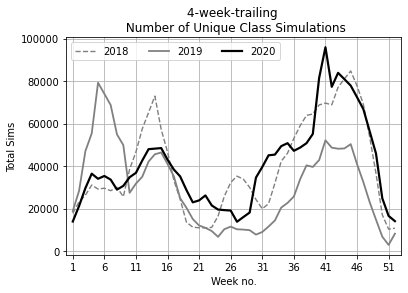

In [44]:
# plot number of cluster sims
plt.figure('cluster_sims')
weeks = range(1,interval+1)

# plt.plot(weeks,year1['Number_Cluster_Simulations'],color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2_4['Number_Cluster_Simulations'],color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3_4['Number_Cluster_Simulations'],color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4_4['Number_Cluster_Simulations'],color='black',label='2020',linewidth=2.2)
plt.legend(loc = 'upper left',ncol=4)
plt.grid(True)
# plt.ylim(-1000,30000)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('4-week-trailing \n Number of Unique Class Simulations')
plt.xlabel('Week no.')
plt.ylabel('Total Sims')
plt.savefig('total_sims_4week.png',dpi=500,transparent=True)
plt.savefig('total_sims2_4week.png',dpi=500)

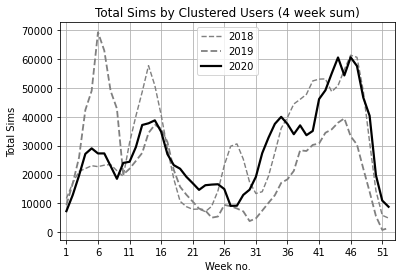

In [102]:

year2_sims = cumsum_year(year2,year1,ind='Number_Cluster_Simulations')
year3_sims = cumsum_year(year3,year2,ind='Number_Cluster_Simulations')
year4_sims = cumsum_year(year4,year3,ind='Number_Cluster_Simulations')

weeks = range(1,interval+1)

plt.figure('total_sims_4week_sum')
plt.plot(weeks,year2_sims,color='grey',linestyle='dashed',label='2018',linewidth=1.4)  
plt.plot(weeks,year3_sims,color='grey',label='2019',linewidth=1.8)    
plt.plot(weeks,year4_sims,color='black',label='2020',linewidth=2.2) 
plt.legend(loc='upper center')
plt.grid(True)

plt.title('Total Sims by Clustered Users (4 week sum)')
plt.xlabel('Week no.')
plt.ylabel('Total Sims')
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.savefig('total_sims_4week_sum.png',dpi=500,transparent=True)
plt.savefig('total_sims2_4week_sum.png',dpi=500)

## Total Simulations (%)

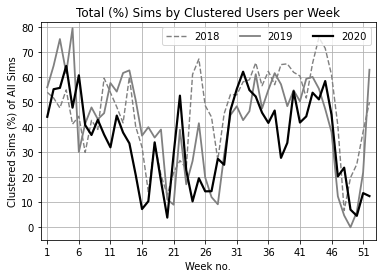

In [106]:
# plot percentage of clustered sims ##Number_Cluster_Simulations
plt.figure('cluster_sims_percents')
weeks = range(1,interval+1)
weeks2 = range(interval)
# year1_per_sims = [year1.iloc[i,-2]/year1.iloc[i,-1]*100 for i in weeks]
year2_per_sims = [year2.iloc[i,-2]/year2.iloc[i,-1]*100 for i in weeks2]
year3_per_sims = [year3.iloc[i,-2]/year3.iloc[i,-1]*100 for i in weeks2]
year4_per_sims = [year4.iloc[i,-2]/year4.iloc[i,-1]*100 for i in weeks2]

# plt.plot(weeks,year1_per_sims,color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2_per_sims,color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3_per_sims,color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4_per_sims,color='black',label='2020',linewidth=2.2)
leg = plt.legend( loc = 'upper right',ncol=4)
plt.grid(True)
plt.ylim(-5,82)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('Total (%) Sims by Clustered Users per Week')
plt.xlabel('Week no.')
plt.ylabel('Clustered Sims (%) of All Sims')
plt.savefig('total_sims_percent.png',dpi=500,transparent=True)
plt.savefig('total_sims_percent2.png',dpi=500)

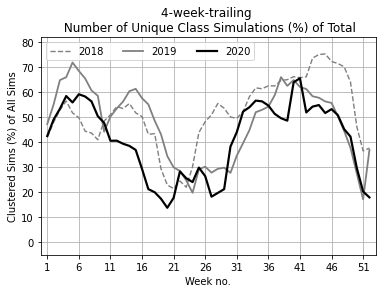

In [45]:
# plot percentage of clustered sims ##Number_Cluster_Simulations
plt.figure('cluster_sims_percents')
weeks = range(1,interval+1)
weeks2 = range(interval)
# year1_per_sims = [year1.iloc[i,-2]/year1.iloc[i,-1]*100 for i in weeks]
year2_per_sims_4 = [year2_4.iloc[i,-2]/year2_4.iloc[i,-1]*100 for i in weeks2]
year3_per_sims_4 = [year3_4.iloc[i,-2]/year3_4.iloc[i,-1]*100 for i in weeks2]
year4_per_sims_4 = [year4_4.iloc[i,-2]/year4_4.iloc[i,-1]*100 for i in weeks2]

# plt.plot(weeks,year1_per_sims,color='green',marker='x',linestyle='dashed',label='2017',linewidth=1)
plt.plot(weeks,year2_per_sims_4,color='grey',linestyle='dashed',label='2018',linewidth=1.4)
plt.plot(weeks,year3_per_sims_4,color='grey',label='2019',linewidth=1.8)
plt.plot(weeks,year4_per_sims_4,color='black',label='2020',linewidth=2.2)
leg = plt.legend( loc = 'upper left',ncol=4)
plt.grid(True)
plt.ylim(-5,82)
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.title('4-week-trailing \n Number of Unique Class Simulations (%) of Total')
plt.xlabel('Week no.')
plt.ylabel('Clustered Sims (%) of All Sims')
plt.savefig('total_sims_percent_4week.png',dpi=500,transparent=True)
plt.savefig('total_sims_percent2_4week.png',dpi=500)

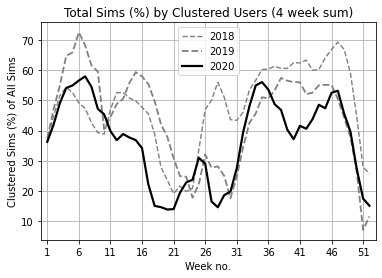

In [105]:

year2_sims_all = cumsum_year(year2,year1,ind='Total_Simulations_All')
year3_sims_all = cumsum_year(year3,year2,ind='Total_Simulations_All')
year4_sims_all = cumsum_year(year4,year3,ind='Total_Simulations_All')

weeks = range(1,interval+1)

year2_per_sims = [year2_sims[i]/year2_sims_all[i]*100 for i in weeks2]
year3_per_sims = [year3_sims[i]/year3_sims_all[i]*100 for i in weeks2]
year4_per_sims = [year4_sims[i]/year4_sims_all[i]*100 for i in weeks2]

plt.figure('total_sims_percent_4week_sum')
plt.plot(weeks,year2_per_sims,color='grey',linestyle='dashed',label='2018',linewidth=1.4)  
plt.plot(weeks,year3_per_sims,color='grey',label='2019',linewidth=1.8)    
plt.plot(weeks,year4_per_sims,color='black',label='2020',linewidth=2.2) 
plt.legend(loc='upper center')
plt.grid(True)

plt.title('Total Sims (%) by Clustered Users (4 week sum)')
plt.xlabel('Week no.')
plt.ylabel('Clustered Sims (%) of All Sims')
plt.xlim([0,53])
plt.xticks(np.arange(1,52,5))

plt.savefig('total_sims_percent_4week_sum.png',dpi=500,transparent=True)
plt.savefig('total_sims2_percent_4week_sum.png',dpi=500)